# 2 | OpenAI Gym API and Gymnasium

This chapter introduces Gymnasium, a library for **Reinforcement Learning (RL)**.
Gymnasium is a fork of OpenAI Gym implementing the same Gym API.
This package provides a uniform API for agents and environments.
You will learn to implement a basic RL agent and gain familiarity with the API.

## The Anatomy of the Agent

The two fundamental concepts in RL learn in previous chapter are:

* **The agent:** an entity in an environment with an active role, or a piece of code implementing some policy.
  The policy decides what action is needed at every time step, given the observations.
* **The environment:** anything in the world except the agent, providing observations and giving reward.
  The environment changes its state based on the agent's actions.

See below a simple Python toy example of agent and environment that give the agent random rewards for a limited number of steps, regardless of the agent's actions.

In [8]:
import random as rnd


class Environment:
    """
    This class represents an environment: the portion of the universe other than the agent.
    It contains a state, returns observations, lists actions, determines when episodes are over and performs agent's actions returning their reward.
    """

    def __init__(self, num_steps: int = 10):
        """
        Initialize the environment internal state.

        The state consists in:
        - a constant stating the maximum number of steps that the agent is allowed to take in the environment
        - a counter initialized to the maximum number of steps that limits the number of steps left.

        The constant and the counter are initialized to the given number of steps (default: 10).

        :param num_steps: the maximum number of steps initially left (default: 10)
        """
        self.steps_left = self.max_steps = num_steps

    def get_observation(self) -> list[float]:
        """
        Return the environment's current observation to the agent.

        The observation is some function of the environment's internal state, typically a list of floats.
        In this instance, it returns the number of steps that the agent has taken so far.

        :return: the environment's current observation as floats
        """
        return [float(self.steps_left - self.max_steps)]

    def get_actions(self) -> list[int]:
        """
        Return the list of unique actions that the agent can execute on the environment.


        The set of actions does not change over time, but some actions are not reachable from some states.
        In this simple example, the only two actions are `wait` and `move` encoded as integers `[0, 1]`.

        :return: the list of unique actions that the agent can execute on the environment
        """
        return [0, 1]

    def is_done(self) -> bool:
        """
        Signal the end of the episode to the agent (no steps left).

        :return: `True` if no further steps are left, `False` otherwise
        """
        return self.steps_left == 0

    def action(self, action: int) -> float:
        """
        Handle the agent's action and return the reward.

        In this example, the reward is random and the action is discarded.
        Moreover, the count of steps is updated and an exception is raised when the episode is over.

        :param action: the action that the agent intends to perform on the environment
        :return: the reward associated to the action performed by the agent on the environment
        """
        if self.is_done():
            raise Exception("Game is over")

        self.steps_left -= 1

        return rnd.random()


class Agent:

    def __init__(self):
        """
        Initialize the agent by setting its reward accumulator to an empty vector.
        """
        self.rewards = []

    @property
    def total_reward(self) -> float:
        """
        Return the total reward accumulated by the agent during the episode.

        The total reward is computed by summing all the rewards accumulated so far by the agent during the episode.

        :return: the sum of the rewards accumulated so far during the episode
        """
        return sum(self.rewards)

    def step(self, env: Environment) -> None:
        """
        Perform one step in the environment.

        A step consists in:
        - observing the environment
        - making a decision about the action to take based on the observation
        - submitting the action to the environment
        - accumulating the reward for the current step.

        In this example the agent is dull and ignores the observations when deciding which action to take.
        Instead, every action is selected randomly.

        :param env: the environment the agent is operating on
        """
        observation = env.get_observation()

        actions = env.get_actions()
        if observation:
            selected_action = rnd.choice(actions)
        else:
            selected_action = rnd.choice(actions)
        reward = env.action(selected_action)
        self.rewards.append(reward)

if __name__ == '__main__':
    # Main method to run the example
    env = Environment()
    agent = Agent()

    while not env.is_done():
        agent.step(env)

    print("Total reward is: %.4f" % agent.total_reward)


Total reward is: 4.9505


Despite its simplicity, the code above illustrates the important basic concepts of RL models.
Typically, the environment is extremely complex such as a physics model, and the agent a large **Neural Network (NN)** implementing the latest RL algorithm.
Yet, the basic pattern is still the same: at every step the agent gets an observation from the environment, does its calculations, and chooses the action to take.
The result of this action will be a reward and a new observation.

Since the pattern is always the same, using an existing library is convenient to avoid the boilerplate.

## Hardware and software requirements

The examples in the book have been tested with Python 3.11.
They should work equally well with any more recent version possibly requiring just minor changes.
Using a virtual environment is very convenient and highly recommended.
Typing has been adopted to better document class and methods.

Despite the many ML and RL libraries available, the list of dependencies has been kept to a minimum:

- **NumPy:** for scientific computing and implementing matrix operations and other common functions,
- **OpenCV Python bindings:** provides many functions for image processing,
- **Gymnasium:** a fork of the OpenAI Gym library (https://github.com/openai/gym) maintained by the Farama Foundation (https://farama.org) for environment models and unified communication with agents,
- **PyTorch:** a flexible and expressive **Deep Learning (DL)** library
- **PyTorch Ignite:** high-level tools (https://pytorch-ignite.ai/) to reduce PyTorch boilerplate code.
- **PTAN:** an open source extension (https://github.com/Shmuma/ptan) to the OpenAI Gym API supporting modern deep RL methods and building blocks.

Notice that PyTorch Ignite reduce PyTorch boilerplate as PyTorch Lightning but in a different way.
PyTorch and PyTorch Ignite will be covered in Chapter 3.
PTAN will be covered as well.

More chapters will cover other libraries for specific tasks:
- Microsoft TextWorld to play text-based games,
- PyBullet and MuJoCo for robotic simulations,
- Selenium for browser-based automation problems,
- etc.

Parts 2, 3, and 4 will cover modern deep RL methods that have been developed over the past few years.
"Deep" in this context means that Deep Learning (DL) is heavily used.

DL is computationally hungry, and modern Graphics Processing Units (GPUs) or Neural Processing Units (NPUs) are 10 to 100 times faster than Central Processing Units (CPUs).
It's highly advisable to use a machine with a GPU or a TPU to speed up the running times.
If your machine doesn't have one, use cloud instances (AWS or GCP) or GPU-powered Jupyter notebooks on Google Colab.

Notice that I'm not sure if TPUs are supported: to be verified!

It's highly advisable to use Linux or macOS.
Windows is supported by PyTorch and Gymnasium, but examples were not fully tested.

The `requirements.txt` file with the exact versions of the dependencies used for the examples in this book is:

    [text]
    gymnasium[atari]==0.29.1
    gymnasium[classic-control]==0.29.1
    gymnasium[accept-rom-license]==0.29.1
    moviepy==1.0.3
    numpy<2
    opencv-python==4.10.0.84
    torch==2.5.0
    torchvision==0.20.0
    pytorch-ignite==0.5.1
    tensorboard==2.18.0
    mypy==1.8.0
    ptan==0.8.1
    stable-baselines3==2.3.2
    torchrl==0.6.0
    ray[tune]==2.37.0
    pytest

## The OpenAI Gym API and Gymnasium

Gym is a Python library developed by OpenAI (www.openai.com).
The first version was released in 2017, and expanded ever since becoming the de facto standard for RL.

In 2021, the OpenAI Gym team moved the development to Gymnasium fork of the original library ([https://github.com/Farama-Foundation/Gymnasium](github.com/Farama-Foundation/Gymnasium)).
Gymnasium provides the same API and is a "drop-in replacement" for Gym: `import gymnasium as gym` and most likely
the code will work.

> Examples in this book are using Gymnasium, but the text will use "Gym" for brevity.
> In rare cases when the difference does matter, the text will use "Gymnasium."

TGym provides a rich collection of environments for RL experiments using a unified interface.
The central class in the library is an environment called Env.
Instances of this class expose several methods and fields that provide its capabilities, including:

- A set of actions that is allowed to be executed in the environment.
  Gym supports both discrete and continuous actions, as well as their combination.
- The shape and boundaries of the observations that the environment provides the agent with.
- A method called `step` to execute an action, which returns the current observation, the reward, and a flag indicating that the episode is over.
- A method called `reset`, which returns the environment to its initial state and obtains the first observation.

### The Action Space
The actions that agents can execute can be discrete, continuous, or a combination of the two.

**Discrete actions** are fixed sets of actions an agent can take, like directions in a grid (left, right, up, down) or pressing a push button.
Action's states are mutually exclusive, defining a discrete action space where only one action from a finite set is possible at a time.

**Continuous actions** have a value, like turning a steering wheel at a specific angle or pressing an accelerator pedal with different force levels.
A description of a continuous action includes its value boundaries.
For instance, a steering wheel's value could range from -720 to 720 degrees, while an accelerator pedal's usually ranges from 0 to 1.

The environment is not limited to a single action at a time.
Multiple actions such as pushing multiple buttons simultaneously or steering the wheel and pressing two pedals can be taken simultaneously.
Gym defines a special container class that allows the nesting of several action spaces into one unified action.

### The Observation Space
Observations are information provided by an environment to an agent at every timestamp, besides the reward.
They can be simple numbers or complex multidimensional tensors like colour images from multiple cameras.
Observations can also be discrete, like action spaces.
For instance, a lightbulb'’'s state can be observed as a Boolean value (on or off).

Actions and observations are similar, and Gym's classes reflect this:

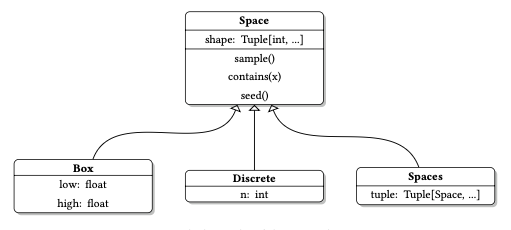

The basic abstract `Space` class includes one property and three methods:
- `shape`: a property with the shape of the space, as with NumPy arrays.
- `sample()`: returns a random sample from the space.
- `contains(x)`: checks whether the argument x belongs to the space's domain.
- `seed()`: initializes a random number generator for the space and all subspaces to get reproducible behavior across several runs.

All these methods are abstract and reimplemented in each of the Space subclasses:

- The Discreteclass represents a mutually exclusive set of items, numbered from 0 to n-1.
  If needed, you can redefine the starting index with the optional constructor argument start.
  The value n is a count of the items our Discrete object describes.
  For example, Discrete(n=4) can be used for an action space of four directions to move in [left, right, up, or down].
- The Box class represents an n-dimensional tensor of rational numbers with intervals [low, high].
  For instance, this could be an accelerator pedal with one single value between 0.0 and 1.0, which could be encoded by Box(low=0.0, high=1.0, shape=(1,), dtype=np.float32).
  Here, the shape argument is assigned a tuple of length 1 with a single value of 1, which gives us a one-dimensional tensor with a single value.
  The dtype parameter specifies the space’s value type, and here, we specify it as a NumPy 32-bit float.
  Another example of Box could be an Atari screen observation (we will cover lots of Atari environments later), which is an RGB (red, green, and blue) image of size 210×160: Box(low=0, high=255, shape=(210, 160, 3), dtype=np.uint8).
  In this case, the shape argument is a tuple of three elements: the first dimension is the height of the image, the second is the width, and the third equals 3, which all correspond to three color planes for red, green, and blue, respectively.
  So, in total, every observation is a three-dimensional tensor with 100,800 bytes.
- The final child of Space is a Tuple class, which allows us to combine several Space class instances together.
  This enables us to create action and observation spaces of any complexity that we want.
  For example, imagine we want to create an action space specification for a car.
  The car has several controls that can be changed at every timestamp, including the steering wheel angle, brake pedal position, and accelerator pedal position.
  These three controls can be specified by three float values in one single Box instance.
  Besides these essential controls, the car has extra discrete controls, like a turn signal (which could be off, right, or left) or horn (on or off).
  To combine all of this into one action space specification class, we can use the following code:
  ```python:
  Tuple(spaces=(
      Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32),
      Discrete(n=3),
      Discrete(n=2)
  ))
  ```
  This flexibility is rarely used; for example, in this book, you will see only the Box and Discrete actions and observation spaces, but the Tuple class can be handy in some cases.

There are other Space subclasses defined in Gym, for example, Sequence (representing variable-length sequences), Text (strings), and Graph (where space is a set of nodes with connections between them).
But the three that we have described are the most useful ones.

Every environment has two members of type Space: the action_space and observation_space.
This allows us to create generic code that could work with any environment.
Of course, dealing with the pixels of the screen is different from handling discrete observations (as in the former case, we may want to preprocess images with convolutional layers or with other methods from the computer vision toolbox); so, most of the time, this means optimizing the code for a particular environment or group of environments, but Gym doesn’t
prevent us from writing generic code.
